# Project - Pelipper Delivery Service

This Project is to create a Data Warehouse for the Pelipper Delivery Service. It contains five dimension tables: Items (Products), Trainers (Customers), Flyers (Sales Reps/Delivery), Towns (Locations) and Dates. They are all linked together in a Fact Table called Fct_Orders.

The Pelipper Delivery Service is essentially Pokemon Amazon. Instead of trainers having to go to certain towns or cities to buy items, they are flown (shipped) to them based on where they are in the Pokemon World. No need to go through the traffic or inconvience of retail, the Pelipper Delivery Service is designed to make buying items as simple as possible.

In [17]:
# Import all Libraries, connect to SQL Server and set Seaborn Graph style to White Grid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import pyodbc

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=localhost;"
                      "Database=Pokemon;"
                      "Trusted_Connection=yes;")
cursor = conn.cursor()

sns.set_style('whitegrid')

The image below is a Database Diagram of the Dimension and Fact Tables. Each Dimension table has a Primary Key that links to a Foreign Key at the Fact Table. This makes it simple to update and add new values to the Dimension Tables without causing errors to the actual data. Also, it allows us to query the data simply for making Graphs and Business Intelligence dashboards (more in the future!)

![title](Images/PDS Diagram Small.png)

In [66]:
# Basic Query that we can run just by joining all the Tables Together
df = pd.read_sql_query('''
SELECT
	Trainers.trainer_name,
	Trainers.trainer_type,
	Items.item_name,
	Items.item_price,
	Towns.town_name,
	Flyers.flyer_name,
	Flyers.flyer_pokemon,
	Dates.date,
	Dates.quarter,
	qty,
	Items.item_price * qty AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
''', conn)

df.head()

,trainer_name,trainer_type,item_name,item_price,town_name,flyer_name,flyer_pokemon,date,quarter,qty,Money Spent
0,Marcus,Fighter,Poke Ball,200,Pallet Town,Gargoyal,Fearow,2000-01-01,1,2.0,400.0
1,Max,Sailor,Max Repel,700,Lavender Town,Enforcer,Pidgeotto,2000-01-01,1,3.0,2100.0
2,Sarah,Swimmer,Max Repel,700,Cinnabar Island,Atlas,Swellow,2000-01-02,1,3.0,2100.0
3,Garrett,Rock Climber,Parlyz Heal,250,Pallet Town,Mongoose,Noctowl,2000-01-03,1,2.0,500.0
4,Will,Elite Four,X Attack,500,Lavender Town,Cataphract,Pelipper,2000-01-03,1,1.0,500.0


This first query shows that after joining all of our tables together, we get these data points: 
The Trainer's name, 
What they bought and how many, 
Who flew the item to them, 
Where they got the item,
At what town,
At a certain date,
and the total amount spent


All of the graphs below show several different ways we can look at the data for the first year of the Pelipper Delivery Service

(array([      0.,   50000.,  100000.,  150000.,  200000.,  250000.,  300000.]),
 <a list of 7 Text yticklabel objects>)

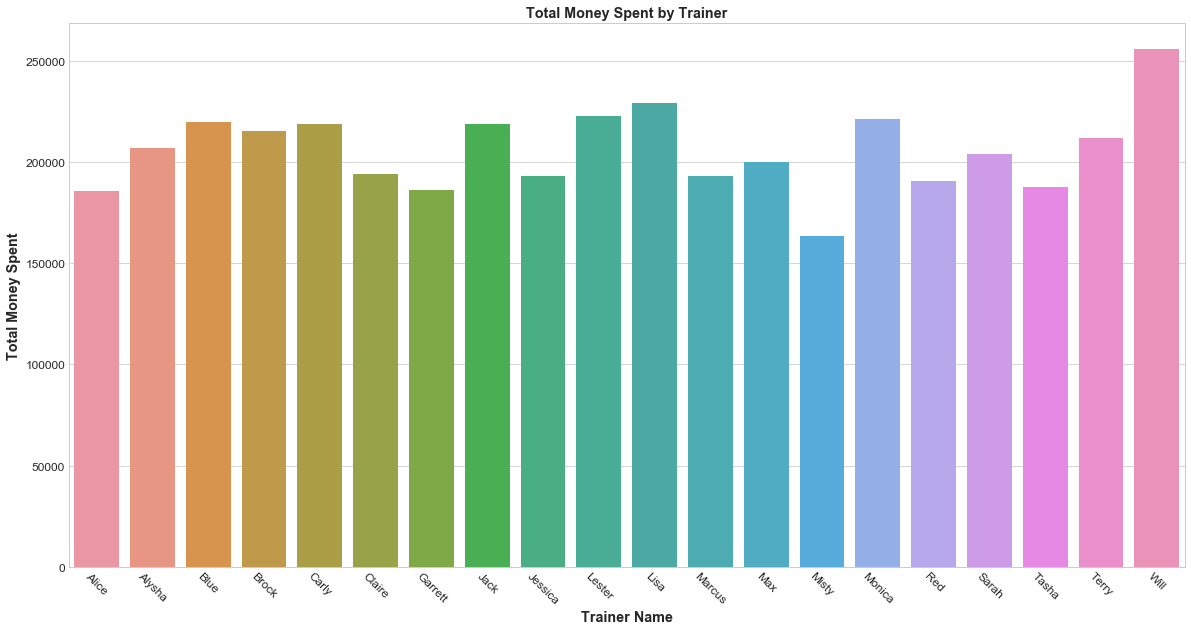

In [60]:
# Query by Total Spent by Trainer
df = pd.read_sql_query('''
SELECT
	Trainers.trainer_name,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY trainer_name
ORDER BY trainer_name
''', conn)

# Bar Graph of Trainer's Total Money Spent
plt.figure(figsize = (20, 10))
sns.barplot(x = 'trainer_name', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Trainer', size = 'x-large', fontweight = 'bold')
plt.xlabel('Trainer Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([       0.,   200000.,   400000.,   600000.,   800000.,  1000000.,
         1200000.,  1400000.]), <a list of 8 Text yticklabel objects>)

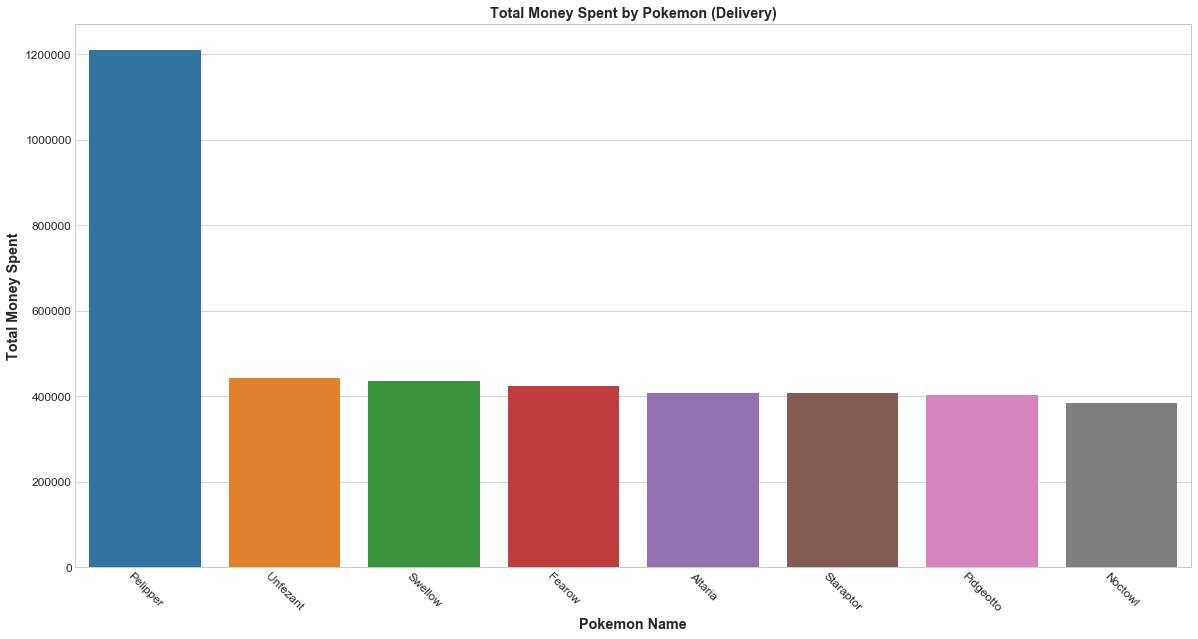

In [59]:
# Query by Money Spent per by Pokemon
df = pd.read_sql_query('''
SELECT
	Flyers.flyer_pokemon,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Flyers.flyer_pokemon
ORDER BY [Money Spent] DESC
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (20, 10))
sns.barplot(x = 'flyer_pokemon', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Pokemon (Delivery)', size = 'x-large', fontweight = 'bold')
plt.xlabel('Pokemon Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.]), <a list of 8 Text yticklabel objects>)

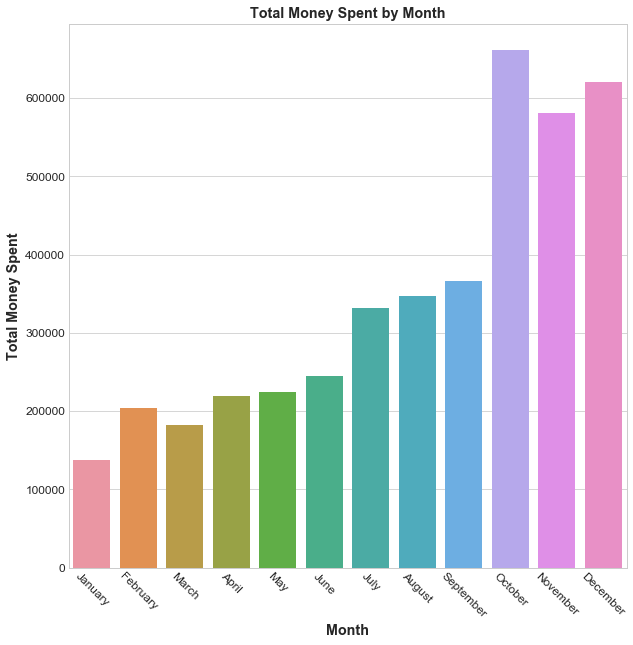

In [61]:
# Query by Money Spent per Month
df = pd.read_sql_query('''
SELECT
	Dates.Month,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Dates.Month
ORDER BY Dates.Month
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Month', size = 'x-large', fontweight = 'bold')
plt.xlabel('Month', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rename x-axis; Rotate ticks
x = [0,1,2,3,4,5,6,7,8,9,10,11]
years_xticks = ['January','February','March','April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(x, years_xticks, rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.]), <a list of 8 Text yticklabel objects>)

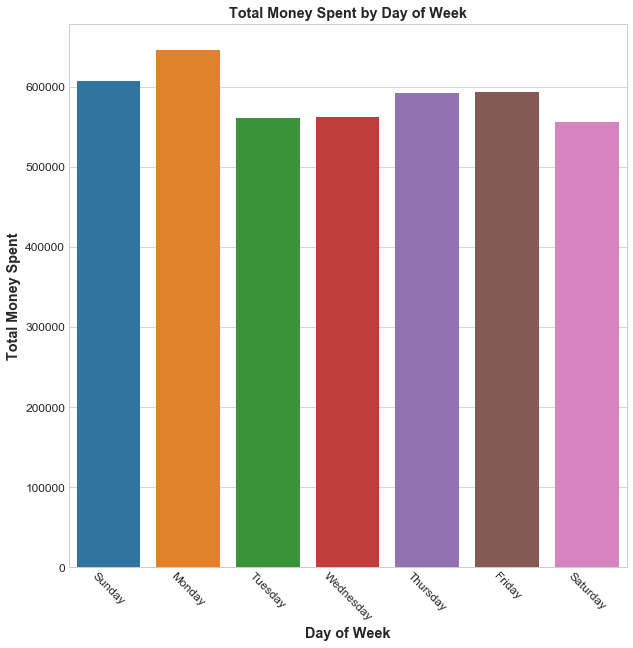

In [62]:
# Query by Day of the week
df = pd.read_sql_query('''
SELECT
	Dates.DayOfWeek,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Dates.DayOfWeek
ORDER BY Dates.DayOfWeek
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (10, 10))
sns.barplot(x = 'DayOfWeek', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Day of Week', size = 'x-large', fontweight = 'bold')
plt.xlabel('Day of Week', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')


# Renaming x-axis; Rotate ticks
x = [0,1,2,3,4,5,6,]
years_xticks = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                'Thursday', 'Friday', 'Saturday']
plt.xticks(x, years_xticks, rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000.]),
 <a list of 10 Text yticklabel objects>)

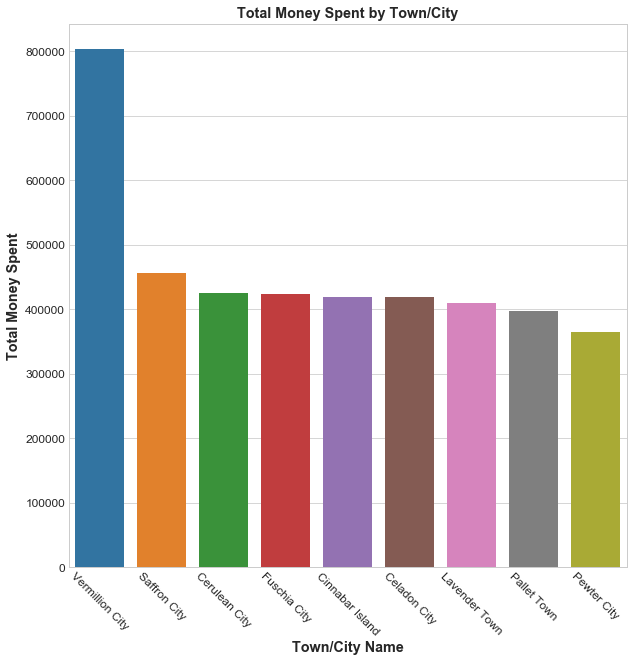

In [63]:
# Query by Town
df = pd.read_sql_query('''
SELECT
	Towns.town_name,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Towns.town_name
ORDER BY [Money Spent] DESC
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (10, 10))
sns.barplot(x = 'town_name', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Town/City', size = 'x-large', fontweight = 'bold')
plt.xlabel('Town/City Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

(0, 140)

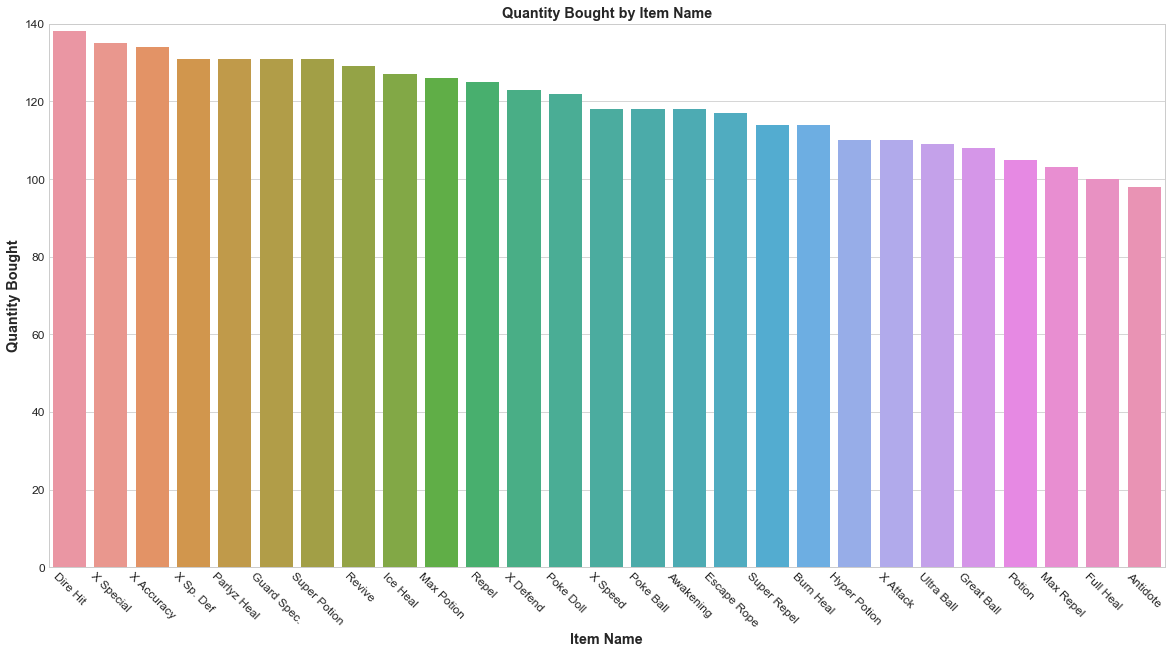

In [65]:
# Query by Town
df = pd.read_sql_query('''
SELECT
	Items.item_name,
	COUNT(*) AS 'Quantity Bought'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Items.item_name
ORDER BY [Quantity Bought] DESC
''', conn)


# Bar Graph
plt.figure(figsize = (20, 10))
sns.barplot(x = 'item_name', y = 'Quantity Bought', data = df)

# Title, x-axis, y-axis
plt.title('Quantity Bought by Item Name', size = 'x-large', fontweight = 'bold')
plt.xlabel('Item Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Quantity Bought', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

# Rounding out the top
plt.ylim(0,140)